In [89]:
import pandas as pd
import json
import requests
from dotenv import load_dotenv, find_dotenv
import os
import hvplot.pandas
import matplotlib.pyplot as plt
from prophet import Prophet
load_dotenv(find_dotenv("local_keys.env"))


True

In [90]:
eia_key = os.getenv("eia")

In [91]:
type(eia_key)

str

In [92]:
fl_url = f"https://api.eia.gov/v2/electricity/retail-sales/data/?api_key={eia_key}&frequency=monthly&data[0]=price&data[1]=sales&facets[stateid][]=FL&facets[sectorid][]=ALL&start=2019-01&end=2023-12&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"

In [93]:
eia_response = requests.get(fl_url)

In [94]:
eia_data = eia_response.json()

In [95]:
print(json.dumps(eia_data, indent=4))

{
    "response": {
        "total": "60",
        "dateFormat": "YYYY-MM",
        "frequency": "monthly",
        "data": [
            {
                "period": "2023-12",
                "stateid": "FL",
                "stateDescription": "Florida",
                "sectorid": "ALL",
                "sectorName": "all sectors",
                "price": "13.39",
                "sales": "17740.90414",
                "price-units": "cents per kilowatt-hour",
                "sales-units": "million kilowatt hours"
            },
            {
                "period": "2023-11",
                "stateid": "FL",
                "stateDescription": "Florida",
                "sectorid": "ALL",
                "sectorName": "all sectors",
                "price": "13.43",
                "sales": "17961.97285",
                "price-units": "cents per kilowatt-hour",
                "sales-units": "million kilowatt hours"
            },
            {
                "period": "2023-

In [96]:
energy = pd.json_normalize(eia_data)
fl_df_energy = energy.explode("response.data")
fl_df_energy.head()

,apiVersion,ExcelAddInVersion,response.total,response.dateFormat,response.frequency,response.data,response.description,request.command,request.params.api_key,request.params.frequency,request.params.data,request.params.facets.stateid,request.params.facets.sectorid,request.params.start,request.params.end,request.params.sort,request.params.offset,request.params.length
0,2.1.7,2.1.0,60,YYYY-MM,monthly,"{'period': '2023-12', 'stateid': 'FL', 'stateDescription': 'Florida', 'sectorid': 'ALL', 'sectorName': 'all sectors', 'price': '13.39', 'sales': '17740.90414', 'price-units': 'cents per kilowatt-hour', 'sales-units': 'million kilowatt hours'}","Electricity sales to ultimate customer by state and sector (number of customers, average price, revenue, and megawatthours of sales). \n Sources: Forms EIA-826, EIA-861, EIA-861M",/v2/electricity/retail-sales/data/,ef9ylDxtxjwKzq7UZOH23iroZkUbi0PicRCovfF0,monthly,"[price, sales]",[FL],[ALL],2019-01,2023-12,"[{'column': 'period', 'direction': 'desc'}]",0,5000
0,2.1.7,2.1.0,60,YYYY-MM,monthly,"{'period': '2023-11', 'stateid': 'FL', 'stateDescription': 'Florida', 'sectorid': 'ALL', 'sectorName': 'all sectors', 'price': '13.43', 'sales': '17961.97285', 'price-units': 'cents per kilowatt-hour', 'sales-units': 'million kilowatt hours'}","Electricity sales to ultimate customer by state and sector (number of customers, average price, revenue, and megawatthours of sales). \n Sources: Forms EIA-826, EIA-861, EIA-861M",/v2/electricity/retail-sales/data/,ef9ylDxtxjwKzq7UZOH23iroZkUbi0PicRCovfF0,monthly,"[price, sales]",[FL],[ALL],2019-01,2023-12,"[{'column': 'period', 'direction': 'desc'}]",0,5000
0,2.1.7,2.1.0,60,YYYY-MM,monthly,"{'period': '2023-10', 'stateid': 'FL', 'stateDescription': 'Florida', 'sectorid': 'ALL', 'sectorName': 'all sectors', 'price': '13.58', 'sales': '20985.83469', 'price-units': 'cents per kilowatt-hour', 'sales-units': 'million kilowatt hours'}","Electricity sales to ultimate customer by state and sector (number of customers, average price, revenue, and megawatthours of sales). \n Sources: Forms EIA-826, EIA-861, EIA-861M",/v2/electricity/retail-sales/data/,ef9ylDxtxjwKzq7UZOH23iroZkUbi0PicRCovfF0,monthly,"[price, sales]",[FL],[ALL],2019-01,2023-12,"[{'column': 'period', 'direction': 'desc'}]",0,5000
0,2.1.7,2.1.0,60,YYYY-MM,monthly,"{'period': '2023-09', 'stateid': 'FL', 'stateDescription': 'Florida', 'sectorid': 'ALL', 'sectorName': 'all sectors', 'price': '13.74', 'sales': '24487.73919', 'price-units': 'cents per kilowatt-hour', 'sales-units': 'million kilowatt hours'}","Electricity sales to ultimate customer by state and sector (number of customers, average price, revenue, and megawatthours of sales). \n Sources: Forms EIA-826, EIA-861, EIA-861M",/v2/electricity/retail-sales/data/,ef9ylDxtxjwKzq7UZOH23iroZkUbi0PicRCovfF0,monthly,"[price, sales]",[FL],[ALL],2019-01,2023-12,"[{'column': 'period', 'direction': 'desc'}]",0,5000
0,2.1.7,2.1.0,60,YYYY-MM,monthly,"{'period': '2023-08', 'stateid': 'FL', 'stateDescription': 'Florida', 'sectorid': 'ALL', 'sectorName': 'all sectors', 'price': '13.31', 'sales': '26956.2963', 'price-units': 'cents per kilowatt-hour', 'sales-units': 'million kilowatt hours'}","Electricity sales to ultimate customer by state and sector (number of customers, average price, revenue, and megawatthours of sales). \n Sources: Forms EIA-826, EIA-861, EIA-861M",/v2/electricity/retail-sales/data/,ef9ylDxtxjwKzq7UZOH23iroZkUbi0PicRCovfF0,monthly,"[price, sales]",[FL],[ALL],2019-01,2023-12,"[{'column': 'period', 'direction': 'desc'}]",0,5000


In [97]:
pd.set_option('display.max_colwidth', None)
fl_energy_data = fl_df_energy[['response.data']].reset_index().drop(columns='index').rename(columns={'response.data': 'data'})
fl_energy_data.head()


,data
0,"{'period': '2023-12', 'stateid': 'FL', 'stateDescription': 'Florida', 'sectorid': 'ALL', 'sectorName': 'all sectors', 'price': '13.39', 'sales': '17740.90414', 'price-units': 'cents per kilowatt-hour', 'sales-units': 'million kilowatt hours'}"
1,"{'period': '2023-11', 'stateid': 'FL', 'stateDescription': 'Florida', 'sectorid': 'ALL', 'sectorName': 'all sectors', 'price': '13.43', 'sales': '17961.97285', 'price-units': 'cents per kilowatt-hour', 'sales-units': 'million kilowatt hours'}"
2,"{'period': '2023-10', 'stateid': 'FL', 'stateDescription': 'Florida', 'sectorid': 'ALL', 'sectorName': 'all sectors', 'price': '13.58', 'sales': '20985.83469', 'price-units': 'cents per kilowatt-hour', 'sales-units': 'million kilowatt hours'}"
3,"{'period': '2023-09', 'stateid': 'FL', 'stateDescription': 'Florida', 'sectorid': 'ALL', 'sectorName': 'all sectors', 'price': '13.74', 'sales': '24487.73919', 'price-units': 'cents per kilowatt-hour', 'sales-units': 'million kilowatt hours'}"
4,"{'period': '2023-08', 'stateid': 'FL', 'stateDescription': 'Florida', 'sectorid': 'ALL', 'sectorName': 'all sectors', 'price': '13.31', 'sales': '26956.2963', 'price-units': 'cents per kilowatt-hour', 'sales-units': 'million kilowatt hours'}"


In [98]:
fl_energy_df = fl_energy_data['data'].apply(pd.Series)
fl_energy_df['period'] = pd.to_datetime(fl_energy_df['period'])
fl_energy_df[['price', 'sales']] = fl_energy_df.loc[:, ['price', 'sales']].astype(float)
fl_energy_df = fl_energy_df.sort_index(ascending=False)
fl_energy_df.head()

,period,stateid,stateDescription,sectorid,sectorName,price,sales,price-units,sales-units
59,2019-01-01,FL,Florida,ALL,all sectors,10.44,17550.53901,cents per kilowatt-hour,million kilowatt hours
58,2019-02-01,FL,Florida,ALL,all sectors,10.47,16527.12967,cents per kilowatt-hour,million kilowatt hours
57,2019-03-01,FL,Florida,ALL,all sectors,10.34,17346.90223,cents per kilowatt-hour,million kilowatt hours
56,2019-04-01,FL,Florida,ALL,all sectors,10.29,17847.81044,cents per kilowatt-hour,million kilowatt hours
55,2019-05-01,FL,Florida,ALL,all sectors,10.25,20583.78364,cents per kilowatt-hour,million kilowatt hours


In [99]:

fl_final_energy = fl_energy_df.drop(columns=['stateid', 'sectorid', 'stateDescription', 'sectorName', 'price-units', 'sales-units'])#.reset_index().drop(columns='index')
fl_final_energy = fl_final_energy.rename(columns={'period':'Date', "price": "cents/KWH", "sales": 'Sales in MillionKWH'})


fl_final_energy = fl_final_energy.groupby("Date")[['cents/KWH',  'Sales in MillionKWH']].sum()
fl_final_energy['Total Revenue'] = (fl_final_energy['cents/KWH'] / 100000) * fl_final_energy['Sales in MillionKWH']

fl_final_energy.head()




,cents/KWH,Sales in MillionKWH,Total Revenue
Date,,,
2019-01-01,10.44,17550.53901,1.832276
2019-02-01,10.47,16527.12967,1.730390
2019-03-01,10.34,17346.90223,1.793670
2019-04-01,10.29,17847.81044,1.836540
2019-05-01,10.25,20583.78364,2.109838


In [100]:
fl_final_energy = fl_final_energy.reset_index()


fl_total_energy_revenue =  fl_final_energy[['Date', 'Total Revenue']]
fl_total_energy_revenue.info()

# fl_total_energy_revenue.columns=['ds','y']
# fl_total_energy_revenue.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           60 non-null     datetime64[ns]
 1   Total Revenue  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


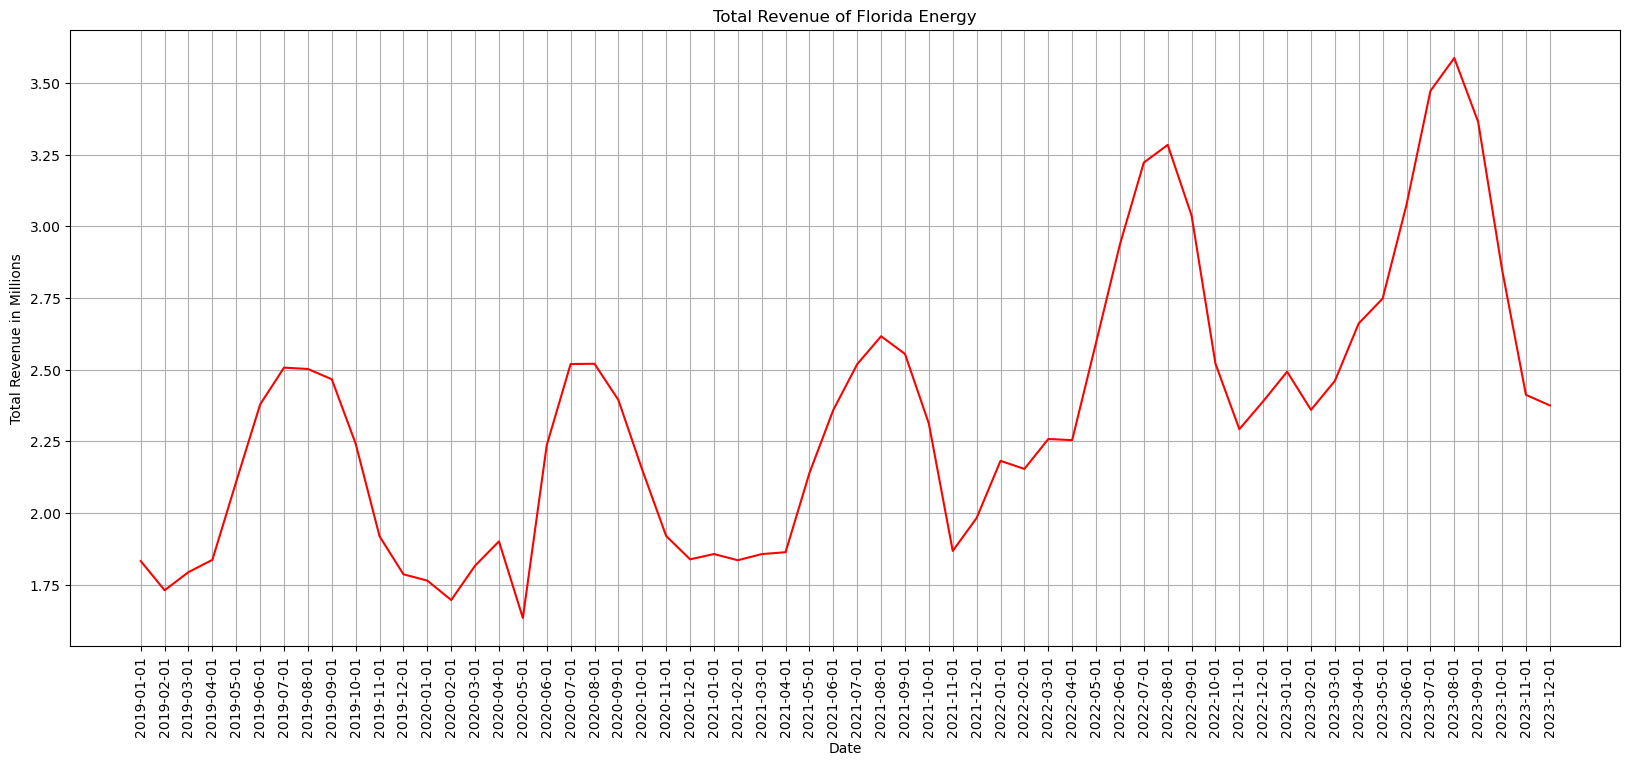

In [104]:
plt.figure(figsize=(20,8))
plt.plot(fl_total_energy_revenue['Date'].astype(str), fl_total_energy_revenue['Total Revenue'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Total Revenue in Millions')
plt.title('Total Revenue of Florida Energy')
plt.grid()
plt.show()